<a href="https://colab.research.google.com/github/GabrielAureo/AD-2021.2-UFRJ/blob/main/Capitulo5/Intervalo_de_confian%C3%A7a_Quest%C3%A3o_5_18_Dobrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Exercício 5.18

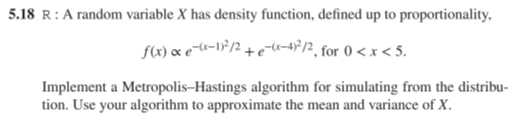

Para distribuição de salto, foi utilizada a distribuição Uniforme(0,5). Como essa distribuição é simétrica, as densidades condicionais se cancelam na função de aceitação. Seja x o estado atual e x’ o estado proposto, a função de aceitação será:

\begin{align}
a(x',x) = \frac{e^{-(x'-1)^2/2} + e^{-(x'-4)^2/2}}{e^{-(x-1)^2/2} + e^{-(x-4)^2/2}}
\end{align}

In [ ]:
def X_mh_sampling():
  
  def f(x):
    return math.exp(-( (x-1)**2 )/2) + math.exp( -((x-4)**2)/2 )
  #função de aceitação
  def a(new, cur):
    return f(new) / f(cur)
  
  trials = 1000000
  cur = 2.5
  simlist = []
  for _ in range(trials):
    new = random.uniform(0,5)
    accept = a(new,cur)

    if(random.uniform(0,1) < accept):
      cur = new
    simlist.append(cur)

  return np.array(simlist)


In [29]:
def plot_X_mh(grid = (5,2)):
  plt.figure(figsize = (grid[1] * 8, grid[0] * 4))
  for i in range(grid[0] * grid[1]):
    samples =  X_mh_sampling()
    ax = plt.subplot(grid[0], grid[1], i + 1)
    ax.margins(y=0)
    ax2 = ax.twinx()
    ax.hist(samples, bins = 25, density = True)
    x = np.linspace(0,5,10000)
    f = np.vectorize(lambda x: math.exp(-( (x-1)**2 )/2) + math.exp( -((x-4)**2)/2 ))
    ax2.plot(x, f(x), color = 'orange', linewidth = 3 )
    plt.ylim(bottom = 0)
 

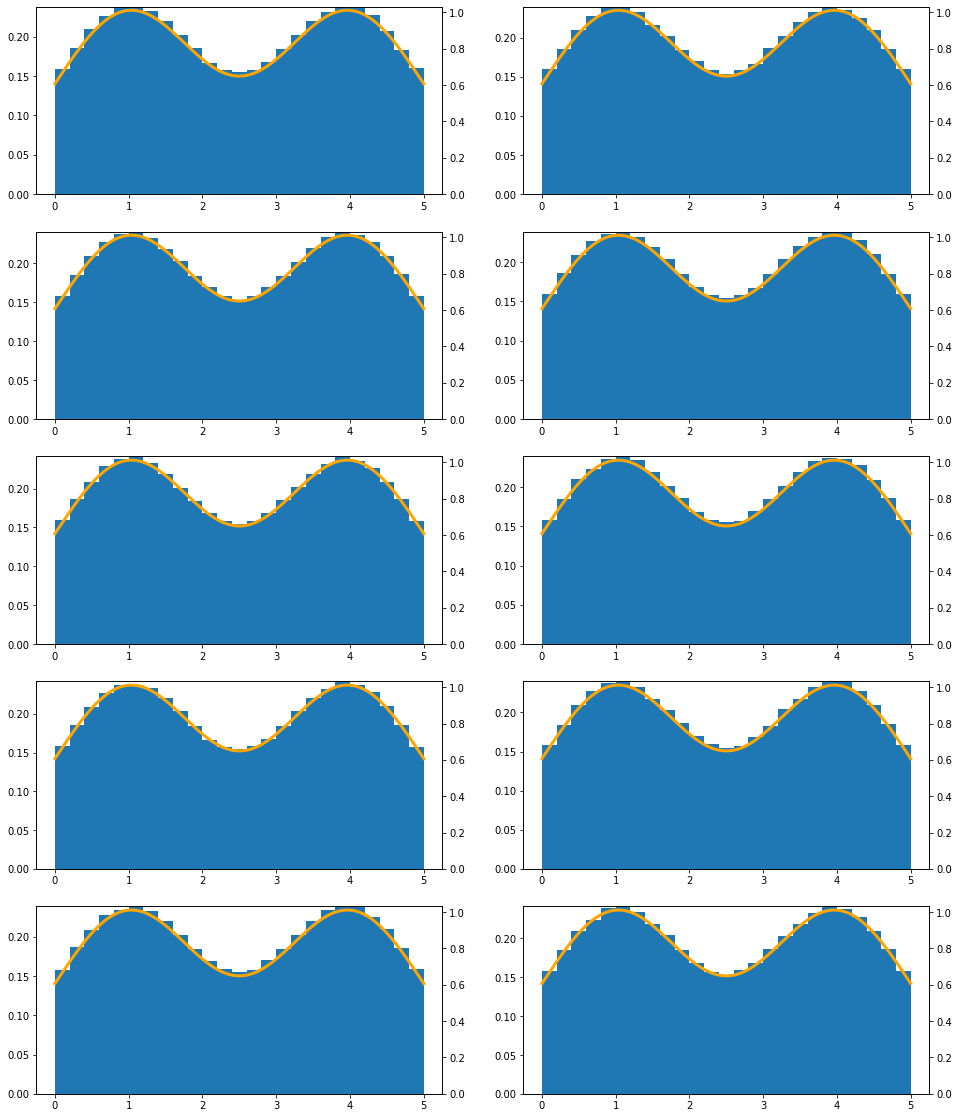

In [30]:
plot_X_mh()

#Cálculo do intervalo de confiança:

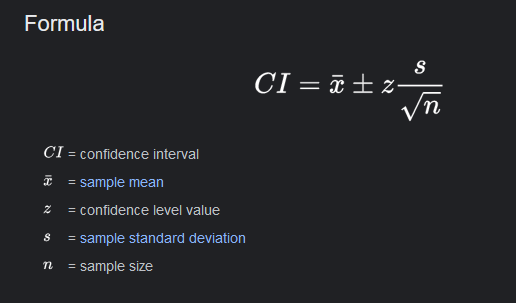

Usaremos 10 para o tamanho de amostras

In [ ]:
n = 10
samples = np.array([X_mh_sampling() for _ in range(n)])

A média das amostras de cada simulação será dada por:

In [ ]:
print(samples.mean(axis = 1))

[2.50066832 2.5011982  2.49951324 2.49630382 2.5006166  2.49887268
 2.5019705  2.50012061 2.50147375 2.50049394]


Calculando a média total

In [ ]:
x_hat = samples.mean()
x_hat

2.5001231662812313

E a variância das amostras de cada simulação

In [ ]:
print(samples.var(axis = 1))

[2.10145089 2.10215075 2.09627781 2.09880821 2.09810621 2.10160096
 2.09695609 2.0981756  2.09888397 2.09982373]


E a variância total

In [ ]:
s = samples.var()
s

2.0992257822868736

Utilizaremos um nível de confiança de 95%

https://www.statisticshowto.com/confidence-level/

In [ ]:
z = 1.96

Unindo tudo, encontramos o intervalo de confiança

In [ ]:
lower_limit = x_hat - z*(s/math.sqrt(n))
upper_limit = x_hat + z*(s/math.sqrt(n) )
CI = (lower_limit, upper_limit )
print(CI)

(1.1990095464660784, 3.8012367860963843)
